Importing Libraries

In [2]:
import pandas as pd
import joblib
import pickle
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  .
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

In [3]:
male_players=pd.read_csv(r'C:\Users\Anna Kodji\Downloads\male_players (legacy).csv')

C:\Users\Anna Kodji\AppData\Local\Temp\ipykernel_19880\2357460276.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players=pd.read_csv(r'C:\Users\Anna Kodji\Downloads\male_players (legacy).csv')


In [4]:
male_players=pd.DataFrame(male_players)

In [5]:
male_players

player_id                                        player_url  \
0          158023                /player/158023/lionel-messi/150002   
1           20801  /player/20801/c-ronaldo-dos-santos-aveiro/150002   
2            9014                  /player/9014/arjen-robben/150002   
3           41236           /player/41236/zlatan-ibrahimovic/150002   
4          167495                /player/167495/manuel-neuer/150002   
...           ...                                               ...   
161578     269011                   /player/269011/ziye-zhao/230002   
161579     269019                   /player/269019/junjie-wu/230002   
161580     271093               /player/271093/kailin-barlow/230002   
161581     271555               /player/271555/gideon-tetteh/230002   
161582     271608           /player/271608/aqeel-al-dhafeeri/230002   

        fifa_version  fifa_update fifa_update_date         short_name  \
0                 15            2       2014-09-18           L. Messi   
1                 15            2       2014-09-18  Cristiano Ronaldo   
2                 15            2       2014-09-18          A. Robben   
3                 15            2       2014-09-18     Z. Ibrahimović   
4                 15            2       2014-09-18           M. Neuer   
...              ...          ...              ...                ...   
161578            23            2       2022-09-26          Zhao Ziye   
161579            23            2       2022-09-26          Wu Junjie   
161580            23            2       2022-09-26          K. Barlow   
161581            23            2       2022-09-26          G. Tetteh   
161582            23            2       2022-09-26     A. Al Dhafeeri   

                                  long_name player_positions  overall  \
0            Lionel Andrés Messi Cuccittini               CF       93   
1       Cristiano Ronaldo dos Santos Aveiro           LW, LM       92   
2                              Arjen Robben       RM, LM, RW       90   
3                        Zlatan Ibrahimović               ST       90   
4                        Manuel Peter Neuer               GK       90   
...                                     ...              ...      ...   
161578                                  赵梓业               RW       46   
161579                                  吴俊杰               LB       46   
161580                        Kailin Barlow              CDM       46   
161581                        Gideon Tetteh           RW, LW       46   
161582                    Aqeel Al Dhafeeri               CB       46   

        potential  ...   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  \
0              95  ...  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3  15+3   
1              92  ...  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3  16+3   
2              90  ...  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3  14+3   
3              90  ...  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  17+3   
4              90  ...  40+3  40+3  36+3  36+3  38+3  38+3  38+3  36+3  87+3   
...           ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
161578         61  ...  32+2  32+2  37+2  36+2  31+2  31+2  31+2  36+2  14+2   
161579         58  ...  41+2  41+2  43+2  44+2  48+2  48+2  48+2  44+2  15+2   
161580         58  ...  45+2  45+2  47+2  47+2  46+2  46+2  46+2  47+2  14+2   
161581         70  ...  30+2  30+2  34+2  32+2  28+2  28+2  28+2  32+2  15+2   
161582         63  ...  40+2  40+2  39+2  41+2  46+2  46+2  46+2  41+2  13+2   

                                          player_face_url  
0       https://cdn.sofifa.net/players/158/023/15_120.png  
1       https://cdn.sofifa.net/players/020/801/15_120.png  
2       https://cdn.sofifa.net/players/009/014/15_120.png  
3       https://cdn.sofifa.net/players/041/236/15_120.png  
4       https://cdn.sofifa.net/players/167/495/15_120.png  
...                                                   ...  
161578  https://cdn.

In [6]:
male_players.head()


player_id                                        player_url  fifa_version  \
0     158023                /player/158023/lionel-messi/150002            15   
1      20801  /player/20801/c-ronaldo-dos-santos-aveiro/150002            15   
2       9014                  /player/9014/arjen-robben/150002            15   
3      41236           /player/41236/zlatan-ibrahimovic/150002            15   
4     167495                /player/167495/manuel-neuer/150002            15   

   fifa_update fifa_update_date         short_name  \
0            2       2014-09-18           L. Messi   
1            2       2014-09-18  Cristiano Ronaldo   
2            2       2014-09-18          A. Robben   
3            2       2014-09-18     Z. Ibrahimović   
4            2       2014-09-18           M. Neuer   

                             long_name player_positions  overall  potential  \
0       Lionel Andrés Messi Cuccittini               CF       93         95   
1  Cristiano Ronaldo dos Santos Aveiro           LW, LM       92         92   
2                         Arjen Robben       RM, LM, RW       90         90   
3                   Zlatan Ibrahimović               ST       90         90   
4                   Manuel Peter Neuer               GK       90         90   

   ...   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  \
0  ...  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3  15+3   
1  ...  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3  16+3   
2  ...  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3  14+3   
3  ...  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  17+3   
4  ...  40+3  40+3  36+3  36+3  38+3  38+3  38+3  36+3  87+3   

                                     player_face_url  
0  https://cdn.sofifa.net/players/158/023/15_120.png  
1  https://cdn.sofifa.net/players/020/801/15_120.png  
2  https://cdn.sofifa.net/players/009/014/15_120.png  
3  https://cdn.sofifa.net/players/041/236/15_120.png  
4  https://cdn.sofifa.net/players/167/495/15_120.png  

[5 rows x 110 columns]

In [7]:
# List of columns to drop
columns_todrop = [
    'player_url', 'player_id', 'fifa_version', 'dob', 'long_name', 'club_team_id', 'club_loaned_from',
    'nationality_id', 'nation_team_id', 'player_tags', 'player_traits', 'real_face',
    'player_face_url', 'club_jersey_number', 'nation_jersey_number', 'club_name', 'fifa_update_date', 'league_id',
    'league_name', 'fifa_update', 'league_level', 'work_rate',
    'club_position', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_name',
    'nation_position'
]

In [8]:
#dropping columns that are not needed
male_players=male_players.drop(columns=columns_todrop)

In [9]:
for columns in male_players.columns:
  print(columns)

short_name
player_positions
overall
potential
value_eur
wage_eur
age
height_cm
weight_kg
preferred_foot
weak_foot
skill_moves
international_reputation
body_type
release_clause_eur
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking_awareness
defending_standing_tackle
defending_sliding_tackle
goalkeeping_diving
goalkeeping_handling
goalkeeping_kicking
goalkeeping_positioning
goalkeeping_reflexes
goalkeeping_speed
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb

In [10]:
#removing columns with high percentage of missing values
threshold = len(male_players) * 0.7
male_players =male_players.dropna(thresh=threshold, axis=1)

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [12]:
#checking for Na's in the dataset
male_players.isna().any()

short_name                     False
player_positions               False
overall                        False
potential                      False
value_eur                       True
wage_eur                        True
age                            False
height_cm                      False
weight_kg                      False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
body_type                      False
pace                            True
shooting                        True
passing                         True
dribbling                       True
defending                       True
physic                          True
attacking_crossing             False
attacking_finishing            False
attacking_heading_accuracy     False
attacking_short_passing        False
attacking_volleys              False
skill_dribbling                False
skill_curve                    False
s

In [13]:
L=[]
L_less=[]
for i in male_players.columns:
    if((male_players[i].isnull().sum())<(0.4*(male_players.shape[0]))):
        L.append(i)
    else:
        L_less.append(i)
df=[L]

In [14]:
#filling missing values
numerical_columns = male_players.select_dtypes(include=['number']).columns
for col in numerical_columns:
    mean_value =male_players[col].mean()
    male_players[col].fillna(mean_value, inplace=True)

# Fill NaN values in categorical columns with the mode
categorical_columns = male_players.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    mode_value = male_players[col].mode()[0]  # mode() returns a Series
    male_players[col].fillna(mode_value, inplace=True)

In [15]:
#checking for Na's in the dataset
male_players.isna().any()

short_name                     False
player_positions               False
overall                        False
potential                      False
value_eur                      False
wage_eur                       False
age                            False
height_cm                      False
weight_kg                      False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
body_type                      False
pace                           False
shooting                       False
passing                        False
dribbling                      False
defending                      False
physic                         False
attacking_crossing             False
attacking_finishing            False
attacking_heading_accuracy     False
attacking_short_passing        False
attacking_volleys              False
skill_dribbling                False
skill_curve                    False
s

In [16]:
scaler = StandardScaler()

In [17]:
#computing columns with + or -
columns1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram',
            'lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb',
            'lb','lcb','cb','rcb','rb', 'gk']

def convert_position_rating(rating):
    if isinstance(rating, str) and '+' in rating:
        try:
            base, modifier = rating.split('+')
            return int(base) + int(modifier)
        except ValueError:
            return rating  # Return the original if there's an error in splitting or converting
    elif isinstance(rating, str):
        try:
            return int(rating)
        except ValueError:
            return rating  # Return the original if it's not a number or the expected format
    else:
        return rating  # Return the original if it's not a string

for position in columns1:
    if position in male_players.columns:
        male_players[position] = male_players[position].apply(convert_position_rating)

# Convert all remaining non-numeric values to NaN and ensure all are numeric
for position in columns1:
    if position in male_players.columns:
        male_players[position] = pd.to_numeric(male_players[position], errors='coerce')



In [18]:
male_players.head()

short_name player_positions  overall  potential    value_eur  \
0           L. Messi               CF       93         95  100500000.0   
1  Cristiano Ronaldo           LW, LM       92         92   79000000.0   
2          A. Robben       RM, LM, RW       90         90   54500000.0   
3     Z. Ibrahimović               ST       90         90   52500000.0   
4           M. Neuer               GK       90         90   63500000.0   

   wage_eur  age  height_cm  weight_kg preferred_foot  weak_foot  skill_moves  \
0  550000.0   27        169         67           Left          3            4   
1  375000.0   29        185         80          Right          4            5   
2  275000.0   30        180         80           Left          2            4   
3  275000.0   32        195         95          Right          4            4   
4  300000.0   28        193         92          Right          4            1   

   international_reputation         body_type       pace   shooting  \
0                         5     Normal (170-)  93.000000  89.000000   
1                         5     Normal (185+)  93.000000  93.000000   
2                         5  Normal (170-185)  93.000000  86.000000   
3                         5     Normal (185+)  76.000000  91.000000   
4                         5     Normal (185+)  68.022672  52.230764   

     passing  dribbling  defending     physic  attacking_crossing  \
0  86.000000  96.000000  27.000000  63.000000                  84   
1  81.000000  91.000000  32.000000  79.000000                  83   
2  83.000000  92.000000  32.000000  64.000000                  80   
3  81.000000  86.000000  34.000000  86.000000                  76   
4  56.938175  62.081872  51.133323  64.814364                  25   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   94                          71                       89   
1                   95                          86                       82   
2                   85                          50                       86   
3                   91                          76                       84   
4                   25                          25                       42   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 85               96           89                 90   
1                 87               93           88                 79   
2                 86               93           85                 83   
3                 92               88           80                 80   
4                 25               25           25                 25   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  76                  96                     96   
1                  72                  92                     91   
2                  76                  90                     93   
3                  76                  90                     74   
4                  41                  31                     58   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     90                94                  94   
1                     94                93                  90   
2                     93                93                  89   
3                     77                86                  85   
4                     61                43                  89   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                80             73             77   
1                63                94             94             89   
2                91                86             61             78   
3                41                93             72             78   
4                35                42             78             44   

   power_strength  power_long_shots  mentality_aggression  \
0              60           

In [19]:
#Making the player_position column include just the player's main position
male_players['player_positions']=male_players['player_positions'].apply(lambda x: x.split(',')[0].strip())

unique_positions = male_players['player_positions'].unique()
unique_positions


array(['CF', 'LW', 'RM', 'ST', 'GK', 'CM', 'LM', 'CDM', 'CB', 'CAM', 'RW',
       'RB', 'LB', 'LWB', 'RWB'], dtype=object)

Encoding Categorical Columns

In [20]:
male_players = pd.DataFrame(male_players)

#Encode categorical variables
preferred_foot_encoded = pd.get_dummies(male_players['preferred_foot'], prefix='preferred_foot')
body_type_encoded = pd.get_dummies(male_players['body_type'], prefix='body_type')


#player_positions_encoded = pd.get_dummies(male_players['player_positions'], prefix='player_positions')

# Concatenate the new one-hot encoded columns back to the original DataFrame
male_players = pd.concat([male_players, preferred_foot_encoded, body_type_encoded], axis=1)
columns_to_drop = ['player_positions', 'preferred_foot', 'body_type']

# Drop only the columns that exist in the DataFrame
columns_existing_to_drop = [col for col in columns_to_drop if col in male_players.columns]
male_players.drop(columns_existing_to_drop, axis=1, inplace=True)

In [21]:
male_players.head()

short_name  overall  potential    value_eur  wage_eur  age  \
0           L. Messi       93         95  100500000.0  550000.0   27   
1  Cristiano Ronaldo       92         92   79000000.0  375000.0   29   
2          A. Robben       90         90   54500000.0  275000.0   30   
3     Z. Ibrahimović       90         90   52500000.0  275000.0   32   
4           M. Neuer       90         90   63500000.0  300000.0   28   

   height_cm  weight_kg  weak_foot  skill_moves  international_reputation  \
0        169         67          3            4                         5   
1        185         80          4            5                         5   
2        180         80          2            4                         5   
3        195         95          4            4                         5   
4        193         92          4            1                         5   

        pace   shooting    passing  dribbling  defending     physic  \
0  93.000000  89.000000  86.000000  96.000000  27.000000  63.000000   
1  93.000000  93.000000  81.000000  91.000000  32.000000  79.000000   
2  93.000000  86.000000  83.000000  92.000000  32.000000  64.000000   
3  76.000000  91.000000  81.000000  86.000000  34.000000  86.000000   
4  68.022672  52.230764  56.938175  62.081872  51.133323  64.814364   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  84                   94                          71   
1                  83                   95                          86   
2                  80                   85                          50   
3                  76                   91                          76   
4                  25                   25                          25   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       89                 85               96           89   
1                       82                 87               93           88   
2                       86                 86               93           85   
3                       84                 92               88           80   
4                       42                 25               25           25   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 90                  76                  96   
1                 79                  72                  92   
2                 83                  76                  90   
3                 80                  76                  90   
4                 25                  41                  31   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     96                     90                94   
1                     91                     94                93   
2                     93                     93                93   
3                     74                     77                86   
4                     58                     61                43   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                80             73   
1                  90                63                94             94   
2                  89                91                86             61   
3                  85                41                93             72   
4                  89                35                42             78   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             77              60                88                    48   
1             89              79                93                    63   
2             78              65                90                    47   
3             78              93                88                    84   
4             44              83                25                    29   

   mentality_interceptions  mentality_positioning  me

In [22]:
print(male_players.columns)

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving'

In [23]:
male_players.drop(columns=['short_name'], inplace=True)

Finding the correlation between dependent and independent variables


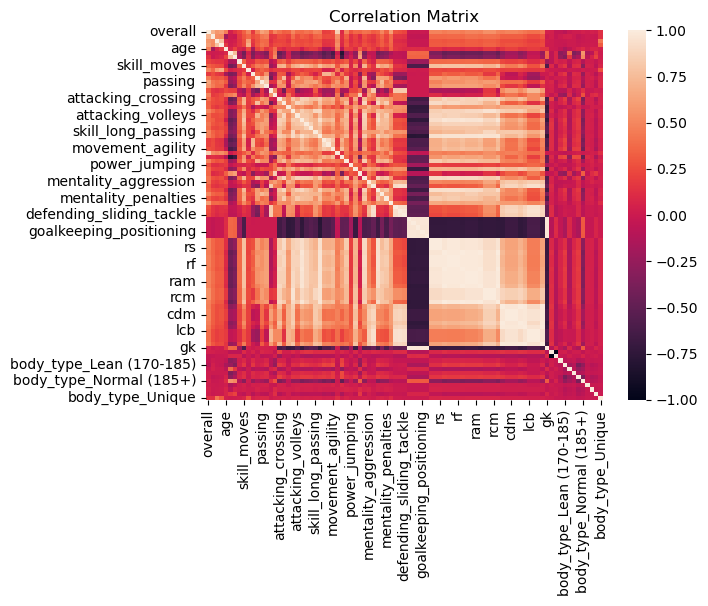

In [24]:
corr_matrix = male_players.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Calculate correlation matrix
correlation_matrix = male_players.corr()

# Extract correlations with the dependent variable
correlations_with_target = correlation_matrix['overall'].abs().sort_values(ascending=False)

In [26]:
# Select top correlated features
top_correlated_features = correlations_with_target.head(10) 

print("Top correlated features with the target variable:")
print(top_correlated_features)

Top correlated features with the target variable:
overall                1.000000
movement_reactions     0.845753
potential              0.695362
passing                0.632617
wage_eur               0.608711
mentality_composure    0.604074
value_eur              0.563962
dribbling              0.563384
rcm                    0.539769
cm                     0.539769
Name: overall, dtype: float64


In [27]:

print("Columns before dropping:")
print(male_players.columns)

# List of columns to drop
attributes_to_drop = [
    'preferred_foot', 'attacking_crossing',
    'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
    'movement_agility', 'movement_balance', 'power_shot_power',
    'power_jumping', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
    'mentality_vision', 'mentality_penalties', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'player_positions_CAM', 'player_positions_CB',
    'player_positions_CDM', 'player_positions_CF', 'player_positions_CM', 'player_positions_GK',
    'player_positions_LB', 'player_positions_LM', 'player_positions_LW', 'player_positions_LWB',
    'player_positions_RB', 'player_positions_RM', 'player_positions_RW', 'player_positions_RWB',
    'player_positions_ST'
]

# Dropping columns 
columns_to_drop = [col for col in attributes_to_drop if col in male_players.columns]
male_players.drop(columns=columns_to_drop, axis=1, inplace=True)

# Print columns after dropping
print("\nColumns after dropping:")
print(male_players.columns)



Columns before dropping:
Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'weak_foot', 'skill_moves', 'international_reputation',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeep

In [28]:
male_players.head()

overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0       93         95  100500000.0  550000.0   27        169         67   
1       92         92   79000000.0  375000.0   29        185         80   
2       90         90   54500000.0  275000.0   30        180         80   
3       90         90   52500000.0  275000.0   32        195         95   
4       90         90   63500000.0  300000.0   28        193         92   

   weak_foot  skill_moves  international_reputation       pace   shooting  \
0          3            4                         5  93.000000  89.000000   
1          4            5                         5  93.000000  93.000000   
2          2            4                         5  93.000000  86.000000   
3          4            4                         5  76.000000  91.000000   
4          4            1                         5  68.022672  52.230764   

     passing  dribbling  defending     physic  attacking_finishing  \
0  86.000000  96.000000  27.000000  63.000000                   94   
1  81.000000  91.000000  32.000000  79.000000                   95   
2  83.000000  92.000000  32.000000  64.000000                   85   
3  81.000000  86.000000  34.000000  86.000000                   91   
4  56.938175  62.081872  51.133323  64.814364                   25   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     96                     90   
1                  92                     91                     94   
2                  90                     93                     93   
3                  90                     74                     77   
4                  31                     58                     61   

   movement_reactions  power_stamina  power_strength  mentality_positioning  \
0                  94             77              60                     92   
1                  90             89              79                     91   
2                  89             78              65                     89   
3                  85             78              93                     86   
4                  89             44              83                     25   

   mentality_composure    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0            57.816892  92.0  92.0  92.0  95.0  93.0  93.0  93.0  95.0  95.0   
1            57.816892  92.0  92.0  92.0  92.0  92.0  92.0  92.0  92.0  92.0   
2            57.816892  87.0  87.0  87.0  90.0  90.0  90.0  90.0  90.0  90.0   
3            57.816892  90.0  90.0  90.0  87.0  89.0  89.0  89.0  87.0  89.0   
4            57.816892  41.0  41.0  41.0  39.0  40.0  40.0  40.0  39.0  39.0   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0  95.0  95.0  93.0  82.0  82.0  82.0  93.0  65.0  65.0  65.0  65.0  65.0   
1  92.0  92.0  90.0  80.0  80.0  80.0  90.0  66.0  66.0  66.0  66.0  66.0   
2  90.0  90.0  90.0  81.0  81.0  81.0  90.0  67.0  67.0  67.0  67.0  67.0   
3  89.0  89.0  86.0  79.0  79.0  79.0  86.0  64.0  68.0  68.0  68.0  64.0   
4  39.0  39.0  41.0  39.0  39.0  39.0  41.0  39.0  43.0  43.0  43.0  39.0   

     lb   lcb    cb   rcb    rb  gk  preferred_foot_Left  \
0  57.0  48.0  48.0  48.0  57.0  18                 True   
1  60.0  55.0  55.0  55.0  60.0  19                False   
2  58.0  49.0  49.0  49.0  58.0  17                 True   
3  59.0  58.0  58.0  58.0  59.0  20                False   
4  39.0  41.0  41.0  41.0  39.0  90                False   

   preferred_foot_Right  body_type_Lean (170-)  body_type_Lean (170-185)  \
0                 False                  False                     False   
1                  True                  False                     False   
2                 False                  False                     False   
3                  True                  False                     False   
4                  True                  False                     False   

   b

Distribution Of Overall Rating

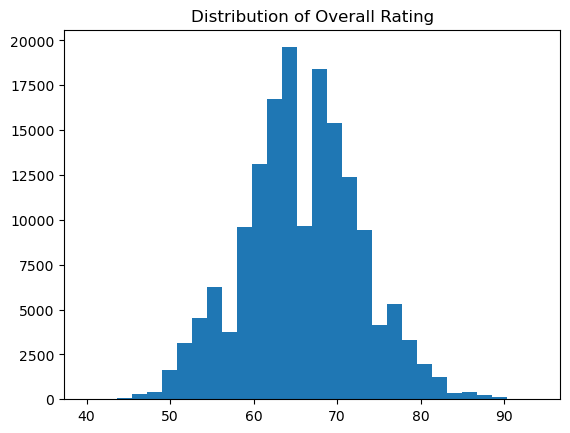

In [29]:
plt.hist(male_players['overall'], bins=30)
plt.title('Distribution of Overall Rating')
plt.show()

In [30]:
male_players.sort_values(by='overall',ascending=False)[["overall","age"]].head(20)


overall  age
32861        94   31
50427        94   32
16182        94   28
68355        94   33
68356        94   31
86441        94   32
0            93   27
104924       93   33
32862        93   29
50428        93   30
123811       93   34
86442        93   34
16183        93   30
50429        92   31
50431        92   25
86443        92   27
68357        92   26
1            92   29
32865        92   24
32864        92   29

In [31]:
male_players_scaled=pd.DataFrame(scaler.fit_transform(male_players), columns=male_players.columns)

In [32]:
male_players_scaled


KeyboardInterrupt



players_22 dataset


In [33]:
players_22=pd.read_csv(r"C:\Users\Anna Kodji\Documents\players_22 rael.csv")

C:\Users\Anna Kodji\AppData\Local\Temp\ipykernel_19880\2496901823.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22=pd.read_csv(r"C:\Users\Anna Kodji\Documents\players_22 rael.csv")


In [34]:
players_22 = pd.DataFrame(players_22)

In [35]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [141]:
players_22

overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0           93         93   78000000.0  320000.0   34        170         72   
1           92         92  119500000.0  270000.0   32        185         81   
2           91         91   45000000.0  270000.0   36        187         83   
3           91         91  129000000.0  270000.0   29        175         68   
4           91         91  125500000.0  350000.0   30        181         70   
...        ...        ...          ...       ...  ...        ...        ...   
19234       47         52      70000.0    1000.0   22        180         64   
19235       47         59     110000.0     500.0   19        175         70   
19236       47         55     100000.0     500.0   21        178         72   
19237       47         60     110000.0     500.0   19        173         66   
19238       47         60     110000.0     500.0   19        167         61   

       weak_foot  skill_moves  international_reputation  pace  shooting  \
0              4            4                         5  85.0      92.0   
1              4            4                         5  78.0      92.0   
2              4            5                         5  87.0      94.0   
3              5            5                         5  91.0      83.0   
4              5            4                         4  76.0      86.0   
...          ...          ...                       ...   ...       ...   
19234          3            2                         1  58.0      35.0   
19235          3            2                         1  59.0      39.0   
19236          3            2                         1  60.0      37.0   
19237          3            2                         1  68.0      46.0   
19238          3            2                         1  68.0      38.0   

       passing  dribbling  defending  physic  attacking_finishing  \
0         91.0       95.0       34.0    65.0                   95   
1         79.0       86.0       44.0    82.0                   95   
2         80.0       88.0       34.0    75.0                   95   
3         86.0       94.0       37.0    63.0                   83   
4         93.0       88.0       64.0    78.0                   82   
...        ...        ...        ...     ...                  ...   
19234     46.0       48.0       42.0    49.0                   32   
19235     50.0       46.0       41.0    51.0                   33   
19236     45.0       49.0       41.0    52.0                   32   
19237     36.0       48.0       15.0    42.0                   49   
19238     45.0       48.0       36.0    48.0                   32   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                      96                     91                     80   
1                      88                     77                     79   
2                      88                     85                     88   
3                      95                     93                     89   
4                      91                     76                     76   
...                   ...                    ...                    ...   
19234                  49                     56                     60   
19235                  42                     60                     58   
19236                  49                     60                     60   
19237                  45                     69                     67   
19238                  38                     70                     67   

       movement_reactions  power_stamina  power_strength  \
0                      94             72              69   
1                      93             76              86   
2                      94             77              77   
3                      89             81              53   
4                      91             89              74   
...                   ...            ...             ...   
19234  

In [143]:
players_22.head()

overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0       93         93   78000000.0  320000.0   34        170         72   
1       92         92  119500000.0  270000.0   32        185         81   
2       91         91   45000000.0  270000.0   36        187         83   
3       91         91  129000000.0  270000.0   29        175         68   
4       91         91  125500000.0  350000.0   30        181         70   

   weak_foot  skill_moves  international_reputation  pace  shooting  passing  \
0          4            4                         5  85.0      92.0     91.0   
1          4            4                         5  78.0      92.0     79.0   
2          4            5                         5  87.0      94.0     80.0   
3          5            5                         5  91.0      83.0     86.0   
4          5            4                         4  76.0      86.0     93.0   

   dribbling  defending  physic  attacking_finishing  skill_ball_control  \
0       95.0       34.0    65.0                   95                  96   
1       86.0       44.0    82.0                   95                  88   
2       88.0       34.0    75.0                   95                  88   
3       94.0       37.0    63.0                   83                  95   
4       88.0       64.0    78.0                   82                  91   

   movement_acceleration  movement_sprint_speed  movement_reactions  \
0                     91                     80                  94   
1                     77                     79                  93   
2                     85                     88                  94   
3                     93                     89                  89   
4                     76                     76                  91   

   power_stamina  power_strength  mentality_positioning  mentality_composure  \
0             72              69                     93                   96   
1             76              86                     95                   88   
2             77              77                     95                   95   
3             81              53                     86                   93   
4             89              74                     88                   89   

     ls    st    rs    lw    lf    cf    rf    rw   lam   cam   ram    lm  \
0  92.0  92.0  92.0  92.0  93.0  93.0  93.0  92.0  93.0  93.0  93.0  93.0   
1  92.0  92.0  92.0  85.0  88.0  88.0  88.0  85.0  89.0  89.0  89.0  87.0   
2  91.0  91.0  91.0  88.0  89.0  89.0  89.0  88.0  89.0  89.0  89.0  89.0   
3  86.0  86.0  86.0  90.0  88.0  88.0  88.0  90.0  91.0  91.0  91.0  91.0   
4  86.0  86.0  86.0  88.0  87.0  87.0  87.0  88.0  91.0  91.0  91.0  91.0   

    lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb  \
0  90.0  90.0  90.0  93.0  69.0  67.0  67.0  67.0  69.0  64.0  53.0  53.0   
1  83.0  83.0  83.0  87.0  67.0  69.0  69.0  69.0  67.0  64.0  63.0  63.0   
2  81.0  81.0  81.0  89.0  66.0  62.0  62.0  62.0  66.0  63.0  56.0  56.0   
3  85.0  85.0  85.0  91.0  70.0  66.0  66.0  66.0  70.0  65.0  53.0  53.0   
4  91.0  91.0  91.0  91.0  82.0  83.0  83.0  83.0  82.0  78.0  72.0  72.0   

    rcb    rb  gk  preferred_foot_Left  preferred_foot_Right  \
0  53.0  64.0  22                 True                 False   
1  63.0  64.0  22                False                  True   
2  56.0  63.0  23                False                  True   
3  53.0  65.0  23                False                  True   
4  72.0  78.0  24                False                  True   

   body_type_Lean (170-)  body_type_Lean (170-185)  body_type_Lean (185+)  \
0                  False                     False                  False   
1                  False                     False                  False   
2                  False                     False                  False   
3                  False                     False                  False   
4         

In [145]:
players_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall                     19239 non-null  int64  
 1   potential                   19239 non-null  int64  
 2   value_eur                   19239 non-null  float64
 3   wage_eur                    19239 non-null  float64
 4   age                         19239 non-null  int64  
 5   height_cm                   19239 non-null  int64  
 6   weight_kg                   19239 non-null  int64  
 7   weak_foot                   19239 non-null  int64  
 8   skill_moves                 19239 non-null  int64  
 9   international_reputation    19239 non-null  int64  
 10  pace                        19239 non-null  float64
 11  shooting                    19239 non-null  float64
 12  passing                     19239 non-null  float64
 13  dribbling                   192

In [147]:
players_22.describe()

overall     potential     value_eur       wage_eur           age  \
count  19239.000000  19239.000000  1.923900e+04   19239.000000  19239.000000   
mean      65.772182     71.079370  2.850452e+06    9017.989363     25.210822   
std        6.880232      6.086213  7.599043e+06   19439.284122      4.748235   
min       47.000000     49.000000  9.000000e+03     500.000000     16.000000   
25%       61.000000     67.000000  4.750000e+05    1000.000000     21.000000   
50%       66.000000     71.000000  9.750000e+05    3000.000000     25.000000   
75%       70.000000     75.000000  2.100000e+06    8000.000000     29.000000   
max       93.000000     95.000000  1.940000e+08  350000.000000     54.000000   

          height_cm     weight_kg     weak_foot   skill_moves  \
count  19239.000000  19239.000000  19239.000000  19239.000000   
mean     181.299704     74.943032      2.946151      2.352461   
std        6.863179      7.069434      0.671560      0.767659   
min      155.000000     49.000000      1.000000      1.000000   
25%      176.000000     70.000000      3.000000      2.000000   
50%      181.000000     75.000000      3.000000      2.000000   
75%      186.000000     80.000000      3.000000      3.000000   
max      206.000000    110.000000      5.000000      5.000000   

       international_reputation          pace      shooting       passing  \
count              19239.000000  19239.000000  19239.000000  19239.000000   
mean                   1.094184     68.213071     52.345297     57.312562   
std                    0.371098     10.309551     13.250149      9.494653   
min                    1.000000     28.000000     18.000000     25.000000   
25%                    1.000000     63.000000     44.000000     52.000000   
50%                    1.000000     68.213071     52.345297     57.312562   
75%                    1.000000     75.000000     62.000000     63.000000   
max                    5.000000     97.000000     94.000000     93.000000   

          dribbling     defending        physic  attacking_finishing  \
count  19239.000000  19239.000000  19239.000000         19239.000000   
mean      62.561174     51.703630     64.823289            45.894433   
std        9.100822     15.266318      9.233378            19.721023   
min       27.000000     14.000000     29.000000             2.000000   
25%       58.000000     40.000000     60.000000            30.000000   
50%       62.561174     53.000000     64.823289            50.000000   
75%       68.000000     63.000000     71.000000            62.000000   
max       95.000000     91.000000     90.000000            95.000000   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
count        19239.000000           19239.000000           19239.000000   
mean            58.472010              64.652893              64.714902   
std             16.663722              15.167399              14.965426   
min              8.000000              14.000000              15.000000   
25%             55.000000              57.000000              58.000000   
50%             63.000000              67.000000              68.000000   
75%             69.000000              75.000000              75.000000   
max             96.000000              97.000000              97.000000   

       movement_reactions  power_stamina  power_strength  \
count        19239.000000   19239.000000    19239.000000   
mean            61.450023      63.084880       65.007745   
std              9.042281      16.145279       12.663518   
min             25.000000      12.000000       19.000000   
25%             56.000000      56.000000       57.000000   
50%             62.000000      66.000000       66.000000   
75%             67.000000      74.000000       74.000000   
max             94.000000      97.000000       97.000000   

       mentality_positioning  mentality_composure            ls            st  \
count           19239.000000         19239.000000  19169.000000 

Data Cleaning

In [36]:
players_22 = players_22.drop(columns=columns_to_drop)

In [37]:
players_22

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34   
1                   ST       92         92  119500000.0  270000.0   32   
2               ST, LW       91         91   45000000.0  270000.0   36   
3              LW, CAM       91         91  129000000.0  270000.0   29   
4              CM, CAM       91         91  125500000.0  350000.0   30   
...                ...      ...        ...          ...       ...  ...   
19234              CDM       47         52      70000.0    1000.0   22   
19235               CM       47         59     110000.0     500.0   19   
19236               CM       47         55     100000.0     500.0   21   
19237               ST       47         60     110000.0     500.0   19   
19238              CAM       47         60     110000.0     500.0   19   

              dob  height_cm  weight_kg  club_team_id            club_name  \
0      1987-06-24        170         72          73.0  Paris Saint-Germain   
1      1988-08-21        185         81          21.0    FC Bayern München   
2      1985-02-05        187         83          11.0    Manchester United   
3      1992-02-05        175         68          73.0  Paris Saint-Germain   
4      1991-06-28        181         70          10.0      Manchester City   
...           ...        ...        ...           ...                  ...   
19234  1999-01-02        180         64      112541.0             Wuhan FC   
19235  2002-03-18        175         70         445.0           Derry City   
19236  2000-02-07        178         72      111131.0           Finn Harps   
19237  2002-04-23        173         66      111131.0           Finn Harps   
19238  2002-02-06        167         61      113040.0  NorthEast United FC   

                          league_name  league_level club_position  \
0                      French Ligue 1           1.0            RW   
1                German 1. Bundesliga           1.0            ST   
2              English Premier League           1.0            ST   
3                      French Ligue 1           1.0            LW   
4              English Premier League           1.0           RCM   
...                               ...           ...           ...   
19234            Chinese Super League           1.0 

In [38]:
#removing columns with high percentage of missing values
threshold = len(players_22) * 0.7
players_22 =players_22.dropna(thresh=threshold, axis=1)

In [39]:
#checking for Na's in the dataset
players_22.isna().any()

sofifa_id           False
player_url          False
short_name          False
long_name           False
player_positions    False
                    ...  
gk                  False
player_face_url     False
club_logo_url        True
club_flag_url        True
nation_flag_url     False
Length: 77, dtype: bool

In [40]:
L=[]
L_less=[]
for i in players_22.columns:
    if((players_22[i].isnull().sum())<(0.4*(players_22.shape[0]))):
        L.append(i)
    else:
        L_less.append(i)
df=[L]

In [121]:
#filling missing values
numerical_columns = players_22.select_dtypes(include=['number']).columns
for col in numerical_columns:
    mean_value =players_22[col].mean()
    players_22[col].fillna(mean_value, inplace=True)

# Fill NaN values in categorical columns with the mode
categorical_columns = players_22.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    mode_value = players_22[col].mode()[0]  # mode() returns a Series
    players_22[col].fillna(mode_value, inplace=True)

In [42]:
#checking for Na's in the dataset
players_22.isna().any()

sofifa_id           False
player_url          False
short_name          False
long_name           False
player_positions    False
                    ...  
gk                  False
player_face_url     False
club_logo_url       False
club_flag_url       False
nation_flag_url     False
Length: 77, dtype: bool

In [122]:
#computing columns with + or -
columns1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram',
            'lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb',
            'lb','lcb','cb','rcb','rb', 'gk']

def convert_position_rating(rating):
    if isinstance(rating, str) and '+' in rating:
        try:
            base, modifier = rating.split('+')
            return int(base) + int(modifier)
        except ValueError:
            return rating  # Return the original if there's an error in splitting or converting
    elif isinstance(rating, str):
        try:
            return int(rating)
        except ValueError:
            return rating  # Return the original if it's not a number or the expected format
    else:
        return rating  # Return the original if it's not a string

for position in columns1:
    if position in players_22.columns:
        players_22[position] = players_22[position].apply(convert_position_rating)

# Convert all remaining non-numeric values to NaN and ensure all are numeric
for position in columns1:
    if position in players_22.columns:
        players_22[position] = pd.to_numeric(players_22[position], errors='coerce')

In [44]:
players_22.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_joined  \
0           1.0            RW                30.0  2021-08-10   
1           1.0            ST                 9.0  2014-07-01   
2           1.0            ST                 7.0  2021-08-27   
3           1.0            LW                10.0  2017-08-03   
4           1.0           RCM                17.0  2015-08-30   

   club_contract_valid_until  nationality_id nationality_name preferred_foot  \
0                     2023.0              52        Argentina           Left   
1                     2023.0              37           Poland          Right   
2                     2023.0              38         Portugal          Right   
3                     2025.0              54           Brazil          Right   
4                     2025.0               7          Belgium          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  pace  shooting  passing  dribbling  \
0       Yes         144300000.0  85.0      92.0     91.0       95.0   
1       Yes         197200000.0  78.0      92.0     79.0       86.0   
2       Yes          83300000.0  87.0      94.0     80.0       88.0   
3       Yes         238700000.0  91.0      83.0     86.0       94.0   
4       Yes         232200000.0  76.0      86.0     93.0       88.0   

   defending  physic  attacking_finishing  skill_ball_control  \
0       34.0    65.0                   95                  96   
1       44.0    82.0                   95                  88   
2       34.0    75.0                   95                  88   
3       37.0    63.0                   83                  95   
4       64.0    78.0                   82                  91   

   movement_acceleration  movement_sprint_speed  movement_reacti

In [123]:
#Making the player_position column include just the player's main position
players_22['player_positions']=players_22['player_positions'].apply(lambda x: x.split(',')[0].strip())

unique_positions = players_22['player_positions'].unique()
unique_positions

KeyError: 'player_positions'

Encoding categorical columns

In [46]:
# Create the DataFrame
players_22 = pd.DataFrame(players_22)

# Step 1: Encode categorical variables
preferred_foot_encoded = pd.get_dummies(players_22['preferred_foot'], prefix='preferred_foot')
body_type_encoded = pd.get_dummies(players_22['body_type'], prefix='body_type')

# Note: Uncomment and apply the same approach if you need to encode 'player_positions'
# player_positions_encoded = pd.get_dummies(players_22['player_positions'], prefix='player_positions')

# Step 2: Concatenate the new one-hot encoded columns back to the original DataFrame
players_22 = pd.concat([players_22, preferred_foot_encoded, body_type_encoded], axis=1)

# Step 3: Drop the original categorical columns ('preferred_foot', 'body_type', 'player_positions')
# Verify that these columns exist before dropping to avoid errors
columns_to_drop = ['player_positions', 'preferred_foot', 'body_type']

# Drop only the columns that exist in the DataFrame
columns_existing_to_drop = [col for col in columns_to_drop if col in players_22.columns]
players_22.drop(columns_existing_to_drop, axis=1, inplace=True)

# Optionally, you can drop other unnecessary columns or rearrange columns as needed
# For demonstration, let's keep it as is

# Print the updated DataFrame to verify the changes
print(players_22)


       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  overall  \
0                L. Messi       Lionel Andrés Messi Cuccittini       93 

Exploratory Data Analysis

In [47]:
players_22.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.923900e+04   19239.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.599043e+06   19439.284122   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.100000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19239.000000  19239.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863179      7.069434   54315.551123      0.746679   
min       16.000000    155.000000     49.000000       1.000000      1.000000   
25%       21.000000    176.000000     70.000000     479.000000      1.000000   
50%       25.000000    181.000000     75.000000    1939.000000      1.000000   
75%       29.000000    186.000000     80.000000  111138.000000      1.000000   
max       54.000000    206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count        19239.000000               19239.000000    19239.000000   
mean            20.945250                2022.764000       58.602682   
std             17.880953                   1.211278       50.298614   
min              1.000000                2021.000000        1.000000   
25%              9.000000                2022.000000       21.000000   
50%             18.000000                2022.000000       45.000000   
75%             27.000000                2024.000000       60.000000   
max             99.000000                2031.000000      219.000000   

          weak_foot   skill_moves  international_reputation  \
count  19239.000000  19239.000000              19239.000000   
mean       2.946151      2.352461                  1.094184   
std        0.671560      0.767659                  0.371098   
min        1.000000      1.000000                  1.000000   
25%        3.000000      2.000000                  1.000000   
50%        3.000000      2.000000                  1.000000   
75%        3.000000      3.000000                  1.000000   
max        5.000000      5.000000                  5.000000   

       release_clause_eur          pace      shooting       passing  \
count        1.923900e+04  19239.000000  19239.000000  19239.000000   
mean         5.374044e+06     68.213071     52.345297     57.312562   
std          1.448427e+07     10.309551     13.250149      9.494653   
min          1.600000e+04     28.000000     18.000000     25.000000   
25%          8.450000e+05     63.000000     44.000000     52.000000   
50%          1.800000e+06     68.213071     52.345297     57.312562   
75%          4.600000e+06     75.000000     62.000000     63.000000   
max          3.735000e+08     97.000000     94.000000     93.000000   

          dribbling     defending        physic  attacking_finishing  \
count  19239.000000  19239.000000  19239.000000         19239.000000   
mean      62.561174     51.703630     64.823289            45.894433   
std        9.100822     15.266318      9.233378            19.721023   
min       27.000000     14.000000     29.000000             2.000000   
25%       58.000000     40.000000     60.000000            30.000000   
50%       62.561174     53.000000     64.823289            50.000000   
75%       68.000000     63.000000     71.000000            62.000000   
max       95.000000     91.000000     90.000000            95.000000   

       skill_ball_control  movement_acceleration  move

In [48]:
players_22.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  overall  potential  \
0           L. Messi       Lionel Andrés Messi Cuccittini       93         93   
1     R. Lewandowski                   Robert Lewandowski       92         92   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro       91         91   
3          Neymar Jr        Neymar da Silva Santos Júnior       91         91   
4       K. De Bruyne                      Kevin De Bruyne       91         91   

     value_eur  wage_eur  age         dob  height_cm  weight_kg  club_team_id  \
0   78000000.0  320000.0   34  1987-06-24        170         72          73.0   
1  119500000.0  270000.0   32  1988-08-21        185         81          21.0   
2   45000000.0  270000.0   36  1985-02-05        187         83          11.0   
3  129000000.0  270000.0   29  1992-02-05        175         68          73.0   
4  125500000.0  350000.0   30  1991-06-28        181         70          10.0   

             club_name             league_name  league_level club_position  \
0  Paris Saint-Germain          French Ligue 1           1.0            RW   
1    FC Bayern München    German 1. Bundesliga           1.0            ST   
2    Manchester United  English Premier League           1.0            ST   
3  Paris Saint-Germain          French Ligue 1           1.0            LW   
4      Manchester City  English Premier League           1.0           RCM   

   club_jersey_number club_joined  club_contract_valid_until  nationality_id  \
0                30.0  2021-08-10                     2023.0              52   
1                 9.0  2014-07-01                     2023.0              37   
2                 7.0  2021-08-27                     2023.0              38   
3                10.0  2017-08-03                     2025.0              54   
4                17.0  2015-08-30                     2025.0               7   

  nationality_name  weak_foot  skill_moves  international_reputation  \
0        Argentina          4            4                         5   
1           Poland          4            4                         5   
2         Portugal          4            5                         5   
3           Brazil          5            5                         5   
4          Belgium          5            4                         4   

     work_rate real_face  release_clause_eur  pace  shooting  passing  \
0   Medium/Low       Yes         144300000.0  85.0      92.0     91.0   
1  High/Medium       Yes         197200000.0  78.0      92.0     79.0   
2     High/Low       Yes          83300000.0  87.0      94.0     80.0   
3  High/Medium       Yes         238700000.0  91.0      83.0     86.0   
4    High/High       Yes         232200000.0  76.0      86.0     93.0   

   dribbling  defending  physic  attacking_finishing  skill_ball_control  \
0       95.0       34.0    65.0                   95                  96   
1       86.0       44.0    82.0                   95                  88   
2       88.0       34.0    75.0                   95                  88   
3       94.0       37.0    63.0                   83                  95   
4       88.0       64.0    78.0                   82                  91   

   movement_acceleration  movement_sprint_speed  movement_reactions  \
0                     91                     80                  94   
1                     77                     79                  93   
2                     85                     88                  94   
3                     93                     89                

In [49]:
print(players_22.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'overall',
       'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm',
       'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'real_face', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_finishing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'power_stamina', 'power_strength',
       'mentality_positioning', 'mentality_composure', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'gk', 'player_face_url', 'club_logo_url

In [50]:
columns_to_drop = [
    'sofifa_id', 'player_url', 'long_name', 'dob', 'club_team_id',
    'club_name', 'league_name', 'league_level', 'club_position',
    'club_jersey_number', 'club_joined', 'club_contract_valid_until',
    'nationality_id', 'nationality_name', 'player_face_url', 'club_logo_url',
    'club_flag_url', 'nation_flag_url', 'work_rate', 'real_face','release_clause_eur',

]

# Filter the columns to drop based on what exists in the DataFrame
columns_existing_to_drop = [col for col in columns_to_drop if col in players_22.columns]

players_22.drop(columns=columns_existing_to_drop, inplace=True)



In [51]:
players_22.head()

short_name  overall  potential    value_eur  wage_eur  age  \
0           L. Messi       93         93   78000000.0  320000.0   34   
1     R. Lewandowski       92         92  119500000.0  270000.0   32   
2  Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3          Neymar Jr       91         91  129000000.0  270000.0   29   
4       K. De Bruyne       91         91  125500000.0  350000.0   30   

   height_cm  weight_kg  weak_foot  skill_moves  international_reputation  \
0        170         72          4            4                         5   
1        185         81          4            4                         5   
2        187         83          4            5                         5   
3        175         68          5            5                         5   
4        181         70          5            4                         4   

   pace  shooting  passing  dribbling  defending  physic  attacking_finishing  \
0  85.0      92.0     91.0       95.0       34.0    65.0                   95   
1  78.0      92.0     79.0       86.0       44.0    82.0                   95   
2  87.0      94.0     80.0       88.0       34.0    75.0                   95   
3  91.0      83.0     86.0       94.0       37.0    63.0                   83   
4  76.0      86.0     93.0       88.0       64.0    78.0                   82   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  88                     77                     79   
2                  88                     85                     88   
3                  95                     93                     89   
4                  91                     76                     76   

   movement_reactions  power_stamina  power_strength  mentality_positioning  \
0                  94             72              69                     93   
1                  93             76              86                     95   
2                  94             77              77                     95   
3                  89             81              53                     86   
4                  91             89              74                     88   

   mentality_composure    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                   96  92.0  92.0  92.0  92.0  93.0  93.0  93.0  92.0  93.0   
1                   88  92.0  92.0  92.0  85.0  88.0  88.0  88.0  85.0  89.0   
2                   95  91.0  91.0  91.0  88.0  89.0  89.0  89.0  88.0  89.0   
3                   93  86.0  86.0  86.0  90.0  88.0  88.0  88.0  90.0  91.0   
4                   89  86.0  86.0  86.0  88.0  87.0  87.0  87.0  88.0  91.0   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0  93.0  93.0  93.0  90.0  90.0  90.0  93.0  69.0  67.0  67.0  67.0  69.0   
1  89.0  89.0  87.0  83.0  83.0  83.0  87.0  67.0  69.0  69.0  69.0  67.0   
2  89.0  89.0  89.0  81.0  81.0  81.0  89.0  66.0  62.0  62.0  62.0  66.0   
3  91.0  91.0  91.0  85.0  85.0  85.0  91.0  70.0  66.0  66.0  66.0  70.0   
4  91.0  91.0  91.0  91.0  91.0  91.0  91.0  82.0  83.0  83.0  83.0  82.0   

     lb   lcb    cb   rcb    rb  gk  preferred_foot_Left  \
0  64.0  53.0  53.0  53.0  64.0  22                 True   
1  64.0  63.0  63.0  63.0  64.0  22                False   
2  63.0  56.0  56.0  56.0  63.0  23                False   
3  65.0  53.0  53.0  53.0  65.0  23                False   
4  78.0  72.0  72.0  72.0  78.0  24                False   

   preferred_foot_Right  body_type_Lean (170-)  body_type_Lean (170-185)  \
0                 False                  False                     False   
1                  True                  False                     False   
2                  True                  False                     False   
3                  True                  False                     False   
4                  True                 

In [52]:
players_22=df = players_22.drop(columns=['short_name'])


Finding the correlation between dependent and indepedent variables

In [53]:
# Calculate correlation matrix
correlation_matrix = players_22.corr()

# Extract correlations with the dependent variable
correlations_with_target = correlation_matrix['overall'].abs().sort_values(ascending=False)

In [54]:
# Select top correlated features (adjust the number as per your requirement)
top_correlated_features = correlations_with_target.head(10)  # Example: Top 10 features

print("Top correlated features with the target variable:")
print(top_correlated_features)

Top correlated features with the target variable:
overall                1.000000
movement_reactions     0.871823
mentality_composure    0.708867
passing                0.663519
potential              0.644275
dribbling              0.618419
wage_eur               0.601001
value_eur              0.553823
lcm                    0.545388
cm                     0.545388
Name: overall, dtype: float64


In [55]:
print(players_22.columns)

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'weak_foot', 'skill_moves', 'international_reputation',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_finishing', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_reactions', 'power_stamina',
       'power_strength', 'mentality_positioning', 'mentality_composure', 'ls',
       'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'preferred_foot_Left',
       'preferred_foot_Right', 'body_type_Lean (170-)',
       'body_type_Lean (170-185)', 'body_type_Lean (185+)',
       'body_type_Normal (170-)', 'body_type_Normal (170-185)',
       'body_type_Normal (185+)', 'body_type_Stocky (170-)',
       'body_type_Stocky (170-185)', 'body_type_Stocky (185+)',
       'body_type_Unique'],
  

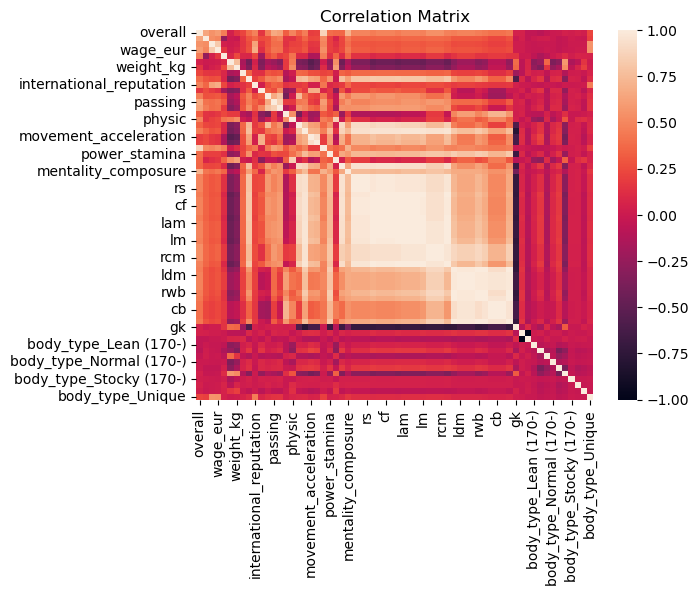

In [56]:
corr_matrix = players_22.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

Distribution of overall rating

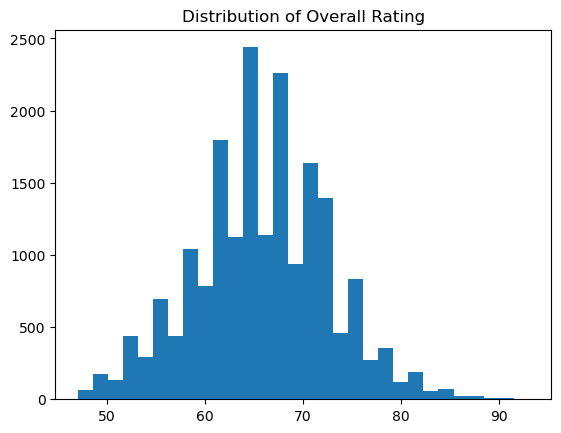

In [57]:
plt.hist(players_22['overall'], bins=30)
plt.title('Distribution of Overall Rating')
plt.show()

In [58]:
players_22_scaled=pd.DataFrame(scaler.fit_transform(players_22), columns=players_22.columns)

In [ ]:
players_22_scaled

In [59]:
# Assume train_df and test_df are your preprocessed datasets

# Separate features (X) and target variable (y) for training data
X_train = male_players_scaled.drop(columns=['overall'])  # Replace 'overall_rating' with your target column name
y_train = male_players['overall']

# Separate features (X) and target variable (y) for testing data
X_test = players_22_scaled.drop(columns=['overall'])  # Replace 'overall_rating' with your target column name
y_test = players_22['overall']


In [60]:
y_test

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64

In [61]:
feature_model = RandomForestRegressor()

In [62]:
pd.set_option('display.max_columns', None)

# If you want to display all rows too
pd.set_option('display.max_rows', None)

In [63]:
# Check for NaNs in X_train
print("Missing values in X_train:")
print(X_train.isna().sum())

# Fill missing values with column mean (or you could use other strategies like median or a fixed value)
X_train = X_train.fillna(X_train.mean())

# Check and handle NaNs in X_test similarly
print("Missing values in X_test:")
print(X_test.isna().sum())
X_test = X_test.fillna(X_test.mean())


Missing values in X_train:
potential                        0
value_eur                        0
wage_eur                         0
age                              0
height_cm                        0
weight_kg                        0
weak_foot                        0
skill_moves                      0
international_reputation         0
pace                             0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
attacking_finishing              0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_reactions               0
power_stamina                    0
power_strength                   0
mentality_positioning            0
mentality_composure              0
ls                             700
st                             700
rs                             700
lw                          

In [64]:
feature_model.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
feature_importance = feature_model.feature_importances_

In [66]:
feature_importance

array([4.39887855e-02, 8.04577493e-01, 1.40491147e-02, 7.63474884e-02,
       2.06440213e-04, 2.24111816e-04, 6.59564742e-05, 4.04578404e-05,
       1.65274121e-03, 1.68783874e-04, 2.41488634e-04, 3.80498136e-04,
       9.32508348e-04, 1.13926905e-03, 4.44121037e-04, 2.83555097e-04,
       3.13144914e-04, 2.15102953e-04, 2.04778342e-04, 2.00956643e-02,
       3.52322987e-04, 2.59361607e-04, 3.05162353e-04, 5.54792030e-03,
       6.24536631e-04, 6.00370230e-04, 5.61278205e-04, 1.08625868e-03,
       1.12953259e-03, 1.32437907e-03, 1.19501145e-03, 1.08097388e-03,
       1.17090517e-04, 1.17950641e-04, 1.20447721e-04, 7.90988229e-04,
       2.46046250e-04, 2.35887976e-04, 2.48602853e-04, 8.30146858e-04,
       6.04077136e-04, 1.88718593e-04, 2.02746940e-04, 1.96704416e-04,
       5.29574863e-04, 1.56973569e-03, 2.37681535e-03, 2.42241069e-03,
       2.33473560e-03, 1.58672327e-03, 5.46533939e-03, 1.75742140e-05,
       1.77165461e-05, 9.29846228e-06, 2.84992415e-05, 2.16310984e-05,
      

In [67]:
feature_importance_df_train = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

In [68]:
feature_importance_df_train = feature_importance_df_train.sort_values(by='Importance', ascending=False)

In [69]:
top_features_list = feature_importance_df_train.head(7)["Feature"].tolist()

In [70]:

top_features_list

['value_eur',
 'age',
 'potential',
 'movement_reactions',
 'wage_eur',
 'mentality_composure',
 'gk']

In [71]:

X_train_subset = X_train[top_features_list]
X_test_subset = X_test[top_features_list]

In [72]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("xGB Boost", xgb.XGBRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boost", GradientBoostingRegressor(n_estimators=100, random_state=42))
]

In [73]:
for name, model in models:
    # Train model
    model.fit(X_train_subset, y_train)

    # Cross-validation
    scores = cross_val_score(model, X_train_subset, y_train, cv=5)

    print(f"{name}: Cross-validation scores: {scores}")

Linear Regression: Cross-validation scores: [0.90542918 0.89035742 0.91108984 0.90078518 0.87753722]
Decision Tree: Cross-validation scores: [0.91381728 0.94492098 0.96723232 0.96033048 0.93111886]
Random Forest: Cross-validation scores: [0.93114235 0.96359889 0.98371517 0.97629884 0.96035702]
xGB Boost: Cross-validation scores: [0.94302865 0.96398976 0.98182518 0.97583696 0.95461035]
Gradient Boost: Cross-validation scores: [0.94074601 0.95861768 0.97329165 0.96717963 0.927306  ]


In [74]:
for name, model in models:
    # Predict on test set
    y_pred = model.predict(X_test_subset)

    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}: MAE = {mae}, RMSE = {rmse}")

Linear Regression: MAE = 1.6985389670503375, RMSE = 2.181161361538111
Decision Tree: MAE = 1.1851187691667966, RMSE = 1.805491015358094
Random Forest: MAE = 0.961742961758399, RMSE = 1.4261742778430417
xGB Boost: MAE = 1.0866630657701062, RMSE = 1.345844188617644
Gradient Boost: MAE = 1.1212248433952978, RMSE = 1.5562924799501636


In [75]:
random_forest = RandomForestRegressor()
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [76]:
xgb_model = xgb.XGBRegressor()
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [77]:
gradient_boost = GradientBoostingRegressor()
gradient_boost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [78]:
models_and_params = [
    (random_forest, random_forest_params, "Random Forest"),
    (xgb_model, xgb_params, "XGB Boost"),
    (gradient_boost, gradient_boost_params, "Gradient Boost")
]

for model, param_grid, name in models_and_params:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_subset, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"\n{name} - Best Parameters: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits

XGB Boost - Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Gradient Boost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [79]:
# Evaluate on the test set
y_pred = best_model.predict(X_test_subset)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"{name} - MAE = {mae}, RMSE = {rmse}")


Gradient Boost - MAE = 0.9070318637751993, RMSE = 1.3436850997349032


In [80]:
#best performing model
best_random_forest = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2)
best_xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7)
best_gradient_boost = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=7)


In [81]:
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', best_random_forest),
    ('xgb', best_xgb_model),
    ('gradient_boost', best_gradient_boost)
])

In [82]:
voting_regressor.fit(X_train_subset, y_train)

VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(n_estimators=200)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          impor...
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('gradient_boost',
                             GradientBoostingRegressor(max_depth=7,
                                                       n_estimators=200))])

In [83]:
y_pred = voting_regressor.predict(X_test_subset)

In [84]:
mae_voting = mean_absolute_error(y_test, y_pred)
rmse_voting = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Voting Ensemble Model: MAE = {mae_voting}, RMSE = {rmse_voting}")

Voting Ensemble Model: MAE = 0.9090824044127428, RMSE = 1.2670310095090327


In [85]:
X_players22 = players_22[X_train_subset.columns]

In [86]:
X_players22

value_eur  age  potential  movement_reactions       wage_eur  \
0      7.800000e+07   34         93                  94  320000.000000   
1      1.195000e+08   32         92                  93  270000.000000   
2      4.500000e+07   36         91                  94  270000.000000   
3      1.290000e+08   29         91                  89  270000.000000   
4      1.255000e+08   30         91                  91  350000.000000   
5      1.120000e+08   28         93                  88  130000.000000   
6      1.940000e+08   22         95                  93  230000.000000   
7      1.350000e+07   35         90                  87   86000.000000   
8      9.900000e+07   29         92                  86  250000.000000   
9      1.295000e+08   27         90                  92  240000.000000   
10     1.000000e+08   30         90                  93  230000.000000   
11     6.600000e+07   33         89                  91  350000.000000   
12     8.550000e+07   29         91                  84  250000.000000   
13     1.040000e+08   28         89                  91  220000.000000   
14     8.800000e+07   29         89                  87  310000.000000   
15     8.600000e+07   29         89                  87  230000.000000   
16     1.010000e+08   29         89                  91  270000.000000   
17     1.010000e+08   29         89                  92  270000.000000   
18     9.400000e+07   27         91                  88  200000.000000   
19     1.080000e+08   26         90                  88  160000.000000   
20     8.200000e+07   28         90                  87  190000.000000   
21     1.195000e+08   22         93                  85  110000.000000   
22     2.400000e+07   35         88                  92  115000.000000   
23     4.450000e+07   34         88                  92  135000.000000   
24     7.500000e+07   31         88                  90  310000.000000   
25     9.350000e+07   28         88                  91  260000.000000   
26     1.550000e+07   34         88                  85  130000.000000   
27     1.075000e+08   26         89                  90  290000.000000   
28     1.075000e+08   26         89                  91  250000.000000   
29     1.375000e+08   20         93                  88  110000.000000   
30     5.100000e+07   33         87                  89  260000.000000   
31     1.350000e+07   34         87                  85  125000.000000   
32     3.200000e+07   35         87                  88  190000.000000   
33     4.950000e+07   33         87                  84  160000.000000   
34     4.200000e+07   31         87                  82  105000.000000   
35     6.600000e+07   31         87                  94  140000.000000   
36     6.750000e+07   31         87                  90  125000.000000   
37     7.950000e+07   28         87                  83  220000.000000   
38     7.950000e+07   28         87                  87  155000.000000   
39     9.050000e+07   27         90                  87  135000.000000   
40     9.300000e+07   26         88                  88  140000.000000   
41     9.300000e+07   27         88                  80  160000.000000   
42     8.350000e+07   27         88                  85  175000.000000   
43     1.195000e+08   24         92                  88  210000.000000   
44     1.140000e+08   22         92                  82  150000.000000   
45     1.165000e+08   21         91                  85  150000.000000   
46     1.025000e+08   24         91                  87  170000.000000   
47     1.200000e+07   36         86                  80   88000.000000   
48     7.500000e+06   36         86                  79   78000.000000   
49     4.400000e+07   32         86                  88   95000.000000   
50     4.700000e+07   32         86                  80  200000.000000   
51     6.500000e+07   30         86                  84  180000.000000   
52     4.500000e+07   32         86                  86  200000.000000   
53     5.35000

In [88]:
X_players22 = pd.DataFrame(scaler.fit_transform(X_players22), columns=X_players22.columns)

In [89]:
X_test_22=X_players22[X_train_subset.columns]

In [90]:

y_pred_22 = voting_regressor.predict(X_test_22)

In [91]:
mae_22 = mean_absolute_error(y_test, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_test, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.9090824044127428
RMSE on players_22: 1.2670310095090327


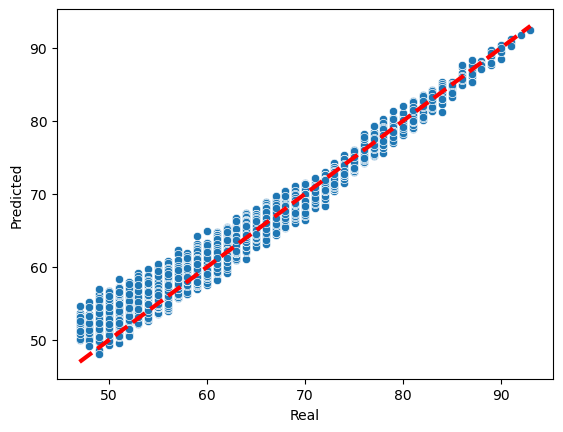

In [92]:
data = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [93]:
best_random_forest.fit(X_train_subset, y_train)

RandomForestRegressor(n_estimators=200)

In [97]:
y_pred_22 = best_random_forest.predict(X_test_22)

In [100]:
mae_22 = mean_absolute_error(y_test, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_test, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.9586157331090864
RMSE on players_22: 1.4222007422048575


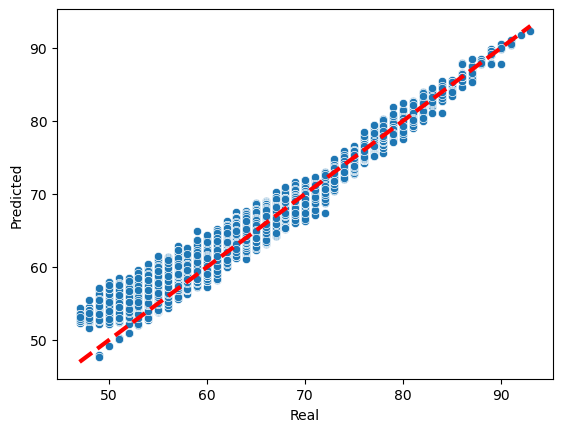

In [102]:
data = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [103]:
best_xgb_model.fit(X_train_subset, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:
y_pred_22 = best_xgb_model.predict(X_test_22)

In [105]:
mae_22 = mean_absolute_error(y_test, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_test, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 1.0641621630754048
RMSE on players_22: 1.3222604735773045


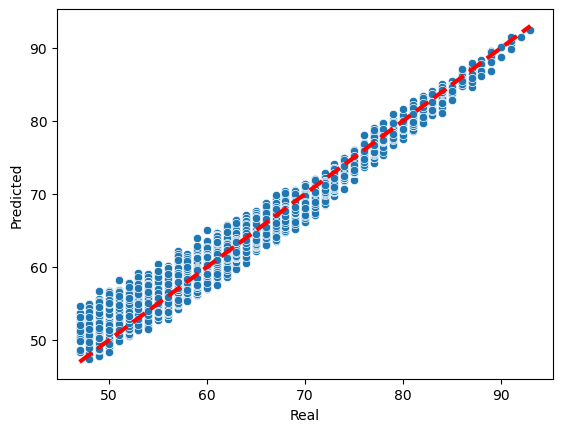

In [106]:
data = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [107]:

best_gradient_boost.fit(X_train_subset, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=200)

In [108]:
y_pred_22 = best_gradient_boost.predict(X_test_22)

In [109]:
mae_22 = mean_absolute_error(y_test, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_test, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.906681798668645
RMSE on players_22: 1.343291777757415


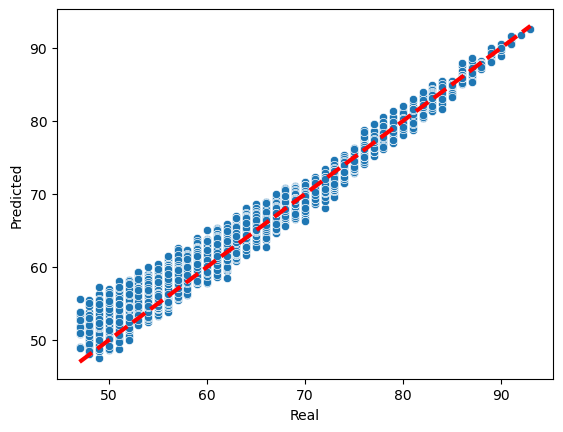

In [111]:
data = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [113]:
with open('top_features_list.pkl', 'wb') as file:
    pickle.dump(top_features_list, file)

In [116]:
joblib.dump(best_gradient_boost, "model.pkl")

['model.pkl']

In [117]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [119]:
print(type(best_gradient_boost))

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [120]:
import os
cwd = os.getcwd()
print(cwd)


C:\Users\Anna Kodji\Downloads


Gradient Boosting Regressor provides the best model